In [40]:
import psycopg2 as pg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)



In [33]:
connection = pg.connect("host=127.0.0.1 dbname=postgres user=postgres password=qwerty123")
df = pd.read_sql_query('select * from postgres.public."vehicles"',con=connection)

In [34]:
def describe_data(data, columns_to_review):
    result_dataframe = pd.DataFrame(columns=columns_to_review, index=["median","mode", "mean", "25%", "50%", "75%", "std",
                                                                      "max", "min", "cnt_nan", "cnt_unique"])
    for column in columns_to_review:
        median_value = data[column].median()
        mode_value = list(dict(data[column].value_counts()).keys())[0]
        mean_value = data[column].mean()
        quantile_25 = data[column].quantile(0.25)
        quantile_50 = data[column].quantile(0.5)
        quantile_75 = data[column].quantile(0.75)
        std_value = data[column].std()
        max_value = data[column].max()
        min_value = data[column].min()
        count_nan = data[column].isnull().sum()
        count_unique = data[column].unique().__len__()
        
        result_dataframe[column] = [median_value, mode_value, mean_value, quantile_25, quantile_50, quantile_75,
                                    std_value, max_value, min_value, count_nan, count_unique]
    
    return result_dataframe

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423802 entries, 0 to 423801
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423802 non-null  int64  
 1   url           423802 non-null  object 
 2   region        423802 non-null  object 
 3   region_url    423802 non-null  object 
 4   price         423802 non-null  int64  
 5   year          328696 non-null  float64
 6   manufacturer  313201 non-null  object 
 7   model         329614 non-null  object 
 8   condition     176694 non-null  object 
 9   cylinders     197653 non-null  object 
 10  fuel          327167 non-null  object 
 11  odometer      270552 non-null  float64
 12  title_status  327712 non-null  object 
 13  transmission  328018 non-null  object 
 14  vin           184406 non-null  object 
 15  drive         231089 non-null  object 
 16  size          102612 non-null  object 
 17  type          241131 non-null  object 
 18  pain

In [61]:
describe_data(df, ['price', 'odometer'])

,price,odometer
median,9995.00,91747.50
mode,0.00,0.00
mean,30100.23,99421.91
25%,4499.00,44323.00
50%,9995.00,91747.50
75%,18995.00,137236.25
std,4088573.10,120480.34
max,2039470154.00,10000000.00
min,0.00,0.00
cnt_nan,0.00,153250.00


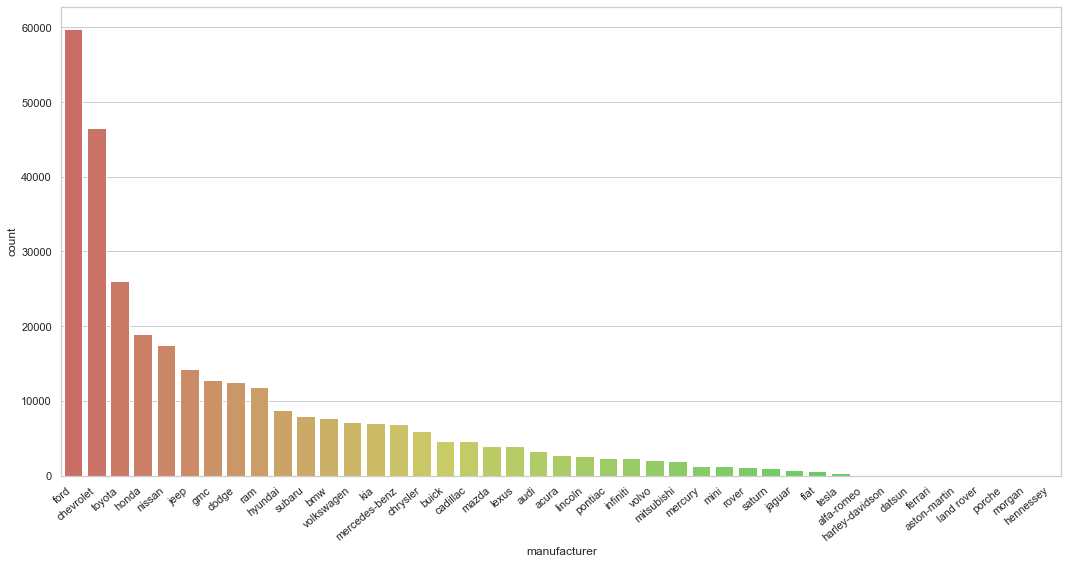

In [63]:
color = sns.color_palette("hls", 100)
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
ax = sns.countplot(x=df['manufacturer'], data=df,
                   order = df['manufacturer'].value_counts().index, 
                   palette=color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

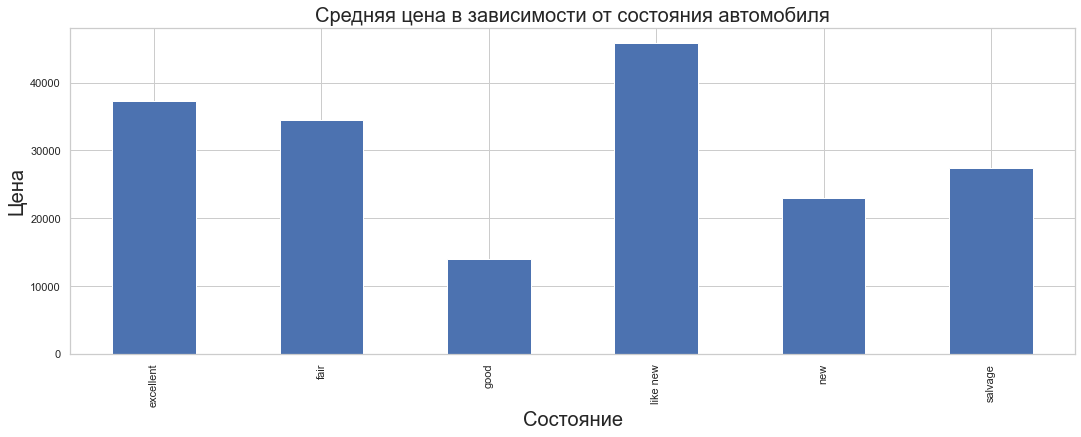

In [65]:
plt.figure(figsize=(18,6))
df.groupby('condition')['price'].mean().plot.bar()
plt.title("Средняя цена в зависимости от состояния автомобиля", fontsize=20)
plt.ylabel('Цена', fontsize=20)
plt.xlabel('Состояние', fontsize=20)
plt.show()